In [1]:
# the imports
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")

# Part 1: Data Analysis

In this section, we will do a deep EDA and take a glance at data. We will describe and explain each part in the Observations section.

In [2]:
# 1) read data
df = pd.read_csv('data\data.csv')

In [3]:
# 2) A glance at the data
df.head()

,Unnamed: 0,_3_pcts_gross_turnover_6,_3_pcts_gross_turnover_7,_3_pcts_gross_turnover_3,_3_pcts_gross_turnover_4,_3_turnover_24months,_3_average_cart_24months_percentile,_3_pcts_gross_turnover_9,_3_pcts_gross_turnover_1,_2_pct_frequency_6months,_2_avg_days_between_orders,_2_pct_frequency_12months,_2_std_days_between_orders,_2_frequency_24months,_2_transactional_recency,_1_customer_tenure_months,_10_target_is_churn
0,1092358,0.013733,0.331460,0.060149,0.005534,6708.06,74,0.261930,0.007065,0.194444,19.0,0.500000,22.099089,36,11,45,0
1,755458,0.262249,0.000000,0.025665,0.021166,5512.82,39,0.248726,0.080948,0.300000,12.0,0.600000,27.022654,60,6,122,0
2,586418,0.196523,0.001541,0.038582,0.038316,3698.36,64,0.061697,0.013268,0.083333,31.0,0.291667,32.485996,24,15,156,0
3,1004412,0.000000,0.040591,0.021907,0.000000,490.26,15,0.646249,0.000000,0.333333,67.0,0.444444,58.519228,9,53,107,0
4,821221,0.000000,0.000000,0.060549,0.006586,2099.42,94,0.000000,0.409614,0.000000,11.0,0.000000,2.645751,4,379,29,1


In the first glace, we observed that there is a column named **Unnamed: 0** which seems to be ID.

In [4]:
# 2.1) deleting unnecessary column
df = df.drop("Unnamed: 0", axis=1)

In [5]:
# 2.2) data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100903 entries, 0 to 100902
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   _3_pcts_gross_turnover_6             100903 non-null  float64
 1   _3_pcts_gross_turnover_7             100903 non-null  float64
 2   _3_pcts_gross_turnover_3             100903 non-null  float64
 3   _3_pcts_gross_turnover_4             100903 non-null  float64
 4   _3_turnover_24months                 100903 non-null  float64
 5   _3_average_cart_24months_percentile  100903 non-null  int64  
 6   _3_pcts_gross_turnover_9             100903 non-null  float64
 7   _3_pcts_gross_turnover_1             100903 non-null  float64
 8   _2_pct_frequency_6months             100903 non-null  float64
 9   _2_avg_days_between_orders           100903 non-null  float64
 10  _2_pct_frequency_12months            100903 non-null  float64
 11  _2_std_days_b

The size of the data is 16 columns (excluding **Unnamed: 0**) and 100903 samples

In [6]:
# 2.3) distribution of the features
df.describe()

,_3_pcts_gross_turnover_6,_3_pcts_gross_turnover_7,_3_pcts_gross_turnover_3,_3_pcts_gross_turnover_4,_3_turnover_24months,_3_average_cart_24months_percentile,_3_pcts_gross_turnover_9,_3_pcts_gross_turnover_1,_2_pct_frequency_6months,_2_avg_days_between_orders,_2_pct_frequency_12months,_2_std_days_between_orders,_2_frequency_24months,_2_transactional_recency,_1_customer_tenure_months,_10_target_is_churn
count,100903.000000,100903.000000,100903.000000,100903.000000,1.009030e+05,100903.000000,100903.000000,100903.000000,100903.000000,100903.000000,100903.000000,100903.000000,100903.000000,100903.000000,100903.000000,100903.000000
mean,0.084013,0.071773,0.078608,0.064923,1.061452e+04,49.990000,0.140680,0.093975,0.226230,42.074448,0.460427,43.153954,31.072624,77.128628,73.582104,0.105359
std,0.134662,0.115180,0.094288,0.089678,7.848123e+04,28.890177,0.174095,0.133020,0.161224,50.022470,0.200095,40.581866,30.387805,110.822171,46.664634,0.307016
min,0.000000,0.000000,0.000000,0.000000,-6.510140e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,24.000000,0.000000
25%,0.000000,0.000000,0.018223,0.009350,1.102905e+03,25.000000,0.015096,0.010584,0.117647,16.000000,0.333333,18.556825,12.000000,12.000000,36.000000,0.000000
50%,0.019449,0.025586,0.050433,0.035268,2.560720e+03,50.000000,0.074330,0.039467,0.210526,28.000000,0.466667,31.559934,23.000000,34.000000,59.000000,0.000000
75%,0.116259,0.090155,0.104254,0.084397,5.975730e+03,75.000000,0.200342,0.123555,0.310345,48.000000,0.583333,53.609357,40.000000,92.000000,96.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,7.332964e+06,100.000000,1.000000,1.000000,1.000000,710.000000,1.000000,509.823989,565.000000,727.000000,249.000000,1.000000


Most of the data are normalized. However, from above table we see a huge difference between min and max values in **\_3_turnover_24months**. Also, it has some negative values that can be outlier. We will analyze it further.

In [7]:
# 2.3.1) negative values in suspected feature (_3_turnover_24months)
df[df['_3_turnover_24months']<0]

,_3_pcts_gross_turnover_6,_3_pcts_gross_turnover_7,_3_pcts_gross_turnover_3,_3_pcts_gross_turnover_4,_3_turnover_24months,_3_average_cart_24months_percentile,_3_pcts_gross_turnover_9,_3_pcts_gross_turnover_1,_2_pct_frequency_6months,_2_avg_days_between_orders,_2_pct_frequency_12months,_2_std_days_between_orders,_2_frequency_24months,_2_transactional_recency,_1_customer_tenure_months,_10_target_is_churn
1942,0.000000,0.000000,0.006056,0.024795,-1405.92,38,0.486634,0.000000,0.200000,71.0,0.300000,66.727889,10,22,30,1
2556,0.000000,0.030659,0.092540,0.069283,-98.93,6,0.047622,0.074834,0.214286,45.0,0.642857,43.313556,14,35,59,0
3954,0.000000,0.206294,0.000000,0.000000,-179.10,0,0.793706,0.000000,0.250000,104.0,0.250000,165.502266,4,129,29,1
4333,1.000000,0.000000,0.000000,0.000000,-22.42,0,0.000000,0.000000,0.000000,274.0,0.000000,0.000000,2,454,26,1
5491,0.000000,0.000000,0.056715,0.035345,-1409.87,42,0.062081,0.524003,0.055556,32.0,0.166667,53.429929,18,176,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92747,0.000000,0.292241,0.148673,0.088055,-2.72,2,0.000000,0.000000,0.333333,319.0,0.333333,85.559921,3,36,28,0
95318,0.000000,0.000000,0.010144,0.000000,-434.44,5,0.129781,0.000000,0.000000,61.0,0.125000,73.479508,8,255,32,0
97918,0.000000,0.000000,0.042133,0.000000,-44.90,2,0.000000,0.000000,0.000000,354.0,0.500000,0.000000,2,233,107,1
98360,0.195061,0.215951,0.103665,0.000000,-80.89,14,0.000000,0.000000,0.000000,59.0,0.000000,76.789973,6,434,27,0


In [8]:
# 2.4) checking duplicates
df.duplicated().any()

False

In [9]:
# 2.5) checking null values
df.isnull().any().any()

False

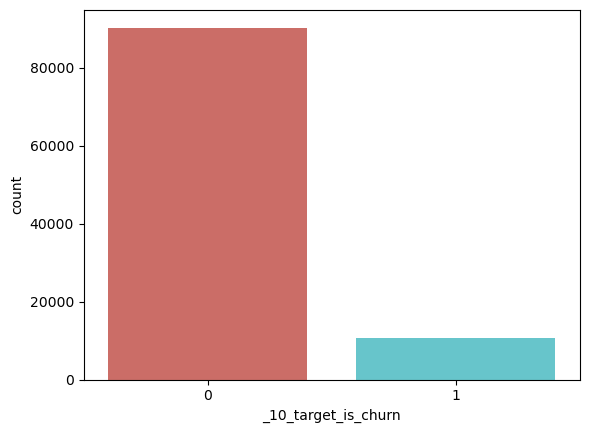

Counter({0: 90272, 1: 10631})


In [10]:
# 2.6) number of samples in each class
sns.countplot(x='_10_target_is_churn',data=df, palette='hls')
plt.show()

print(Counter(df["_10_target_is_churn"]))

There is no duplicate and no null value in the data set. However, the data is not balanced as we can see that the number of classes are significantly different in the target feature.

<AxesSubplot:>

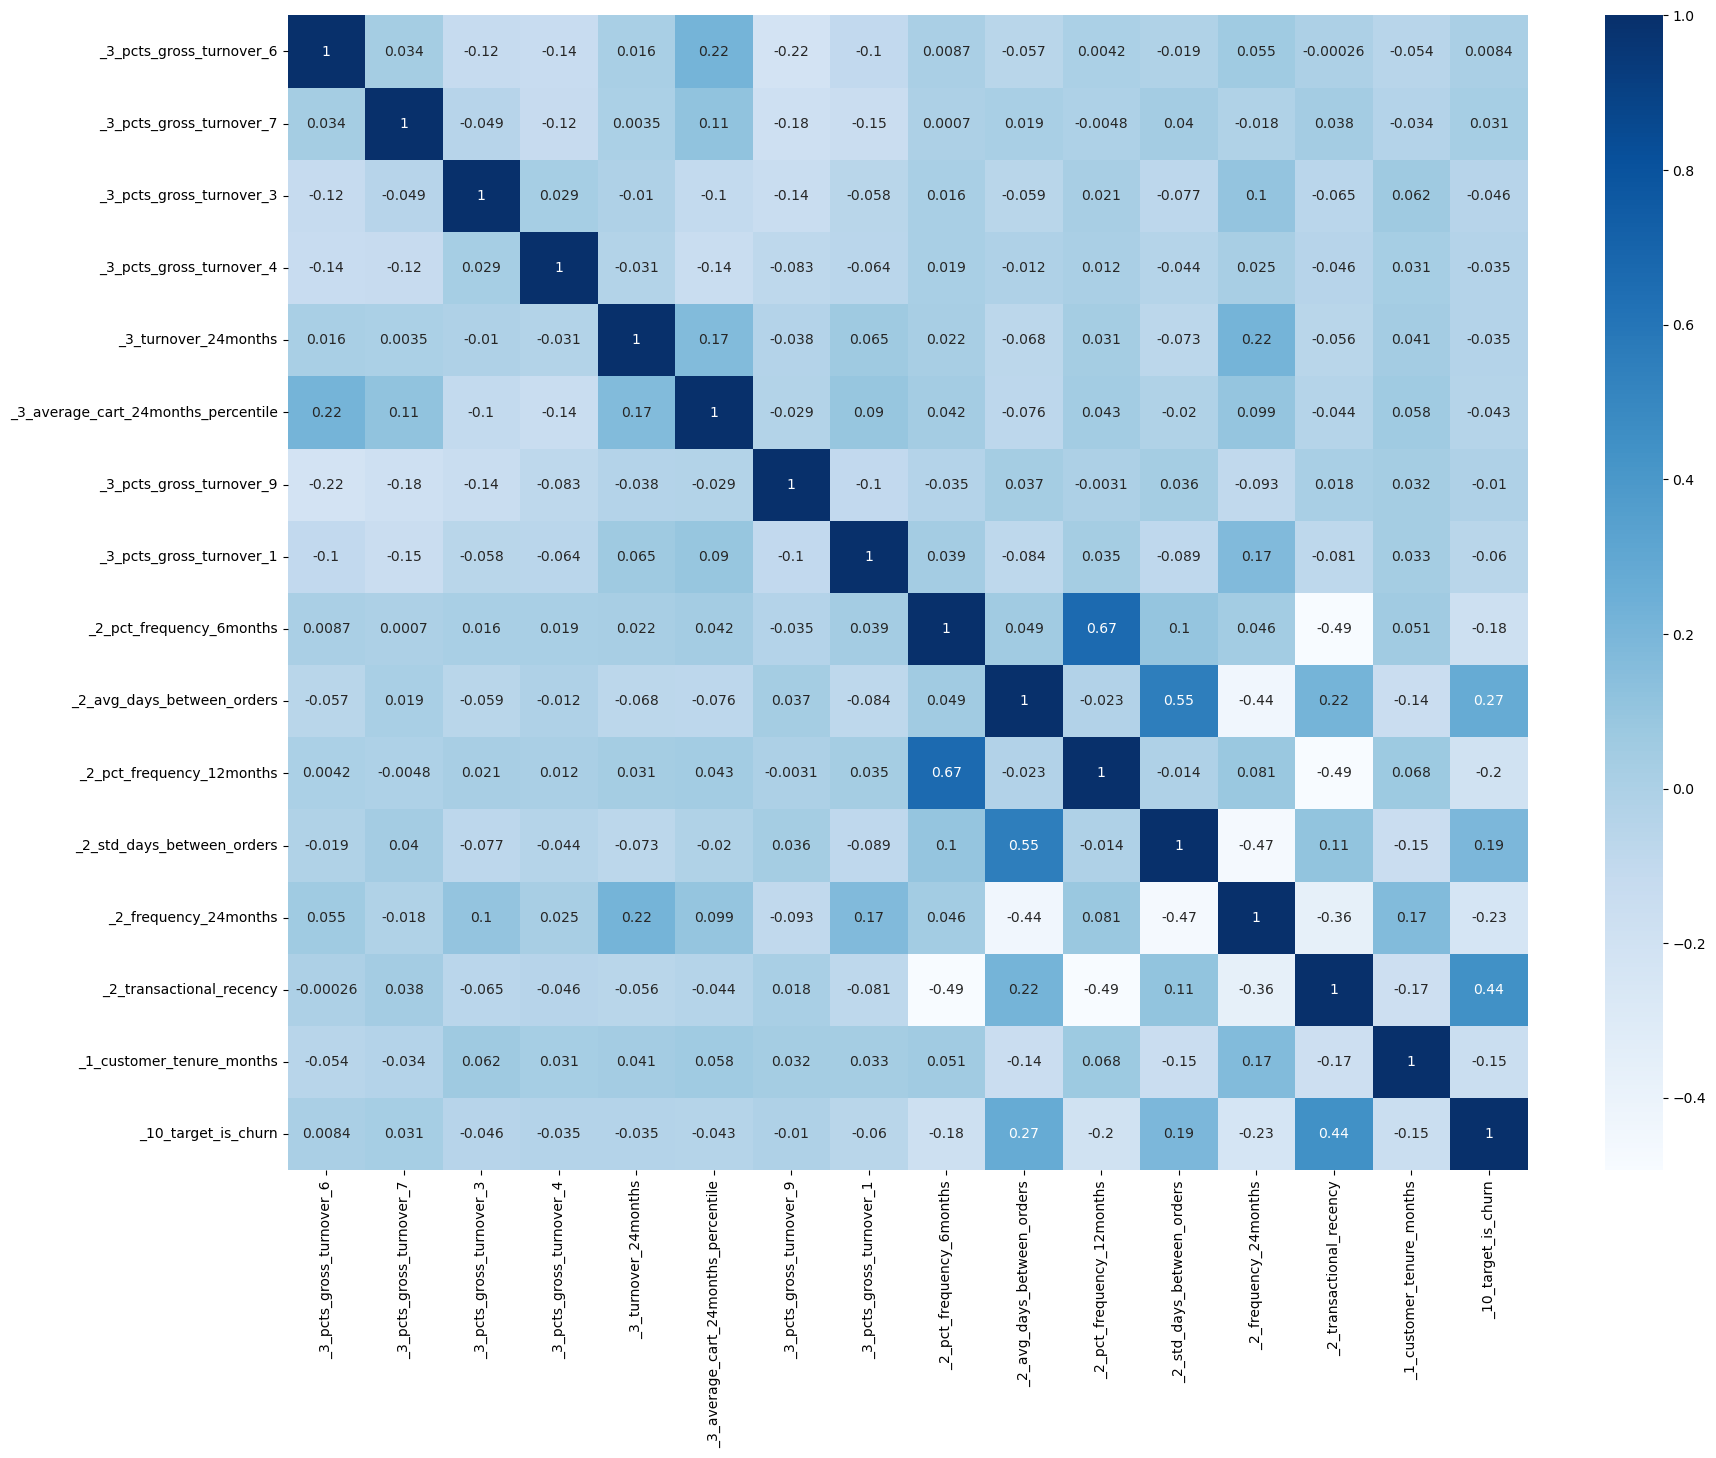

In [11]:
# 3) correlation of the features
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

The correlation matrix helps us to understand the relation of the features with each other as well as their relation with target. We can see that **\_2_transactional_recency** and **\_2_avg_days_between_orders** have positive correlation while **\_2_pct_frequency_12months** and **\_2_frequency_24months** have negative correlation with the target feature. Let's analize some of them:

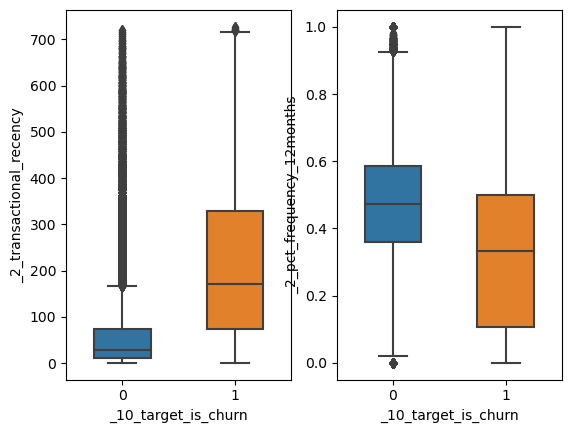

In [12]:
# 3.2) Analyzed some features compared to target (Bivariate)

f, axes = plt.subplots(1, 2)

# 3.2.1) boxplot: A positively correlated feature 
sns.boxplot(x='_10_target_is_churn', y='_2_transactional_recency', data=df, ax=axes[0], width=0.5)

# 3.2.2) boxplot: A negatively correlated feature 
sns.boxplot(x='_10_target_is_churn', y='_2_pct_frequency_12months',data=df, ax=axes[1], width=0.5)

plt.show()

For simplicity we just selected two features: **\_2_transactional_recency** and **\_2_pct_frequency_12months**. We can see the median value of these features for churn and not churn customers. We will describe it more on the observatoin section. In addition, we can see some outliers that can be studied further.

In the next section we will used the normalized data to analyze their distributions (so the plots will be observable):

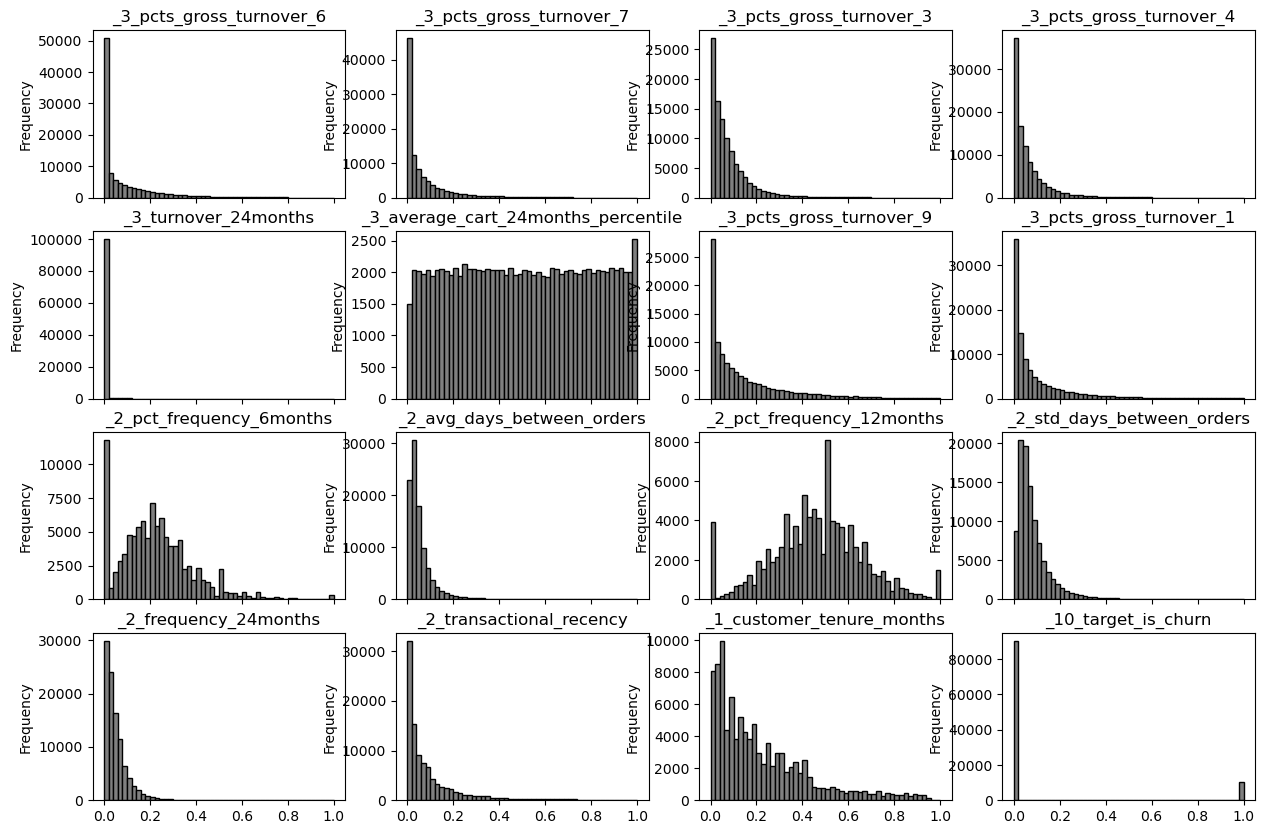

In [13]:
# 3.3) Analyzed some features compared to target (Univariate): histogram and distribution of all features

# normalizing
df_normalized = df.copy()
df_normalized[df_normalized.columns] = MinMaxScaler().fit_transform(df_normalized[df_normalized.columns])

# plots
ax = df_normalized.plot(kind='hist', bins=50, figsize=(15,10), facecolor='grey',edgecolor='black', subplots=True, layout=(4,4), legend=False, title=list(df_normalized.columns))
plt.show()

Here, we can see the distribution of all the existing features. Some of the have symmetrical (normal) distribution (**\_2_pct_frequency_12months**) while others such as **\_2_transactional_recency** are positively skewed. Moreover, we can see that **\_3_average_cart_24months_percentile** has uniform/flat distribution that can be ignored later in our ML model.

<AxesSubplot:>

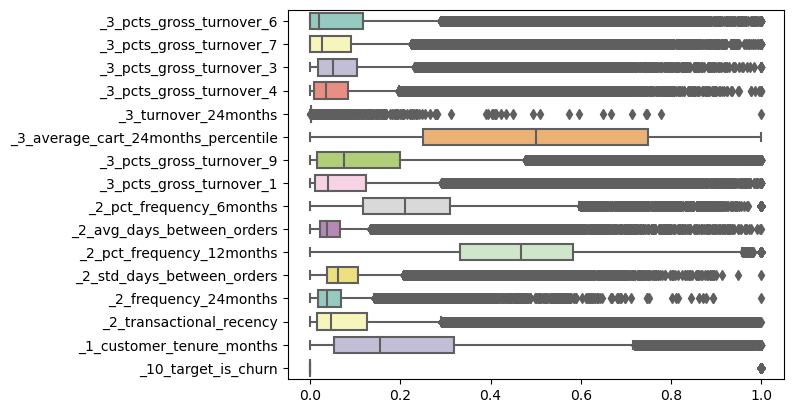

In [14]:
# 4) outliers

# 4.1) boxplot of the features
sns.boxplot(data=df_normalized, orient="h", palette="Set3", width = 0.7)

We can see that most of the features have values out side of the quantiles 1 and 3. But it cannot be all outliers. for simplicity, we take out the %0.05 of percentile from both left and right side of the distribution.

In [15]:
# 4.2) delete from the quantile

Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [16]:
df.describe()

,_3_pcts_gross_turnover_6,_3_pcts_gross_turnover_7,_3_pcts_gross_turnover_3,_3_pcts_gross_turnover_4,_3_turnover_24months,_3_average_cart_24months_percentile,_3_pcts_gross_turnover_9,_3_pcts_gross_turnover_1,_2_pct_frequency_6months,_2_avg_days_between_orders,_2_pct_frequency_12months,_2_std_days_between_orders,_2_frequency_24months,_2_transactional_recency,_1_customer_tenure_months,_10_target_is_churn
count,96785.000000,96785.000000,96785.000000,96785.000000,96785.000000,96785.000000,96785.000000,96785.000000,96785.000000,96785.000000,96785.000000,96785.000000,96785.000000,96785.000000,96785.000000,96785.000000
mean,0.083905,0.070089,0.077282,0.063431,5442.478062,49.044542,0.143499,0.092620,0.224861,39.039035,0.459714,42.777901,30.083866,76.337542,73.592117,0.101441
std,0.133250,0.108487,0.086774,0.080617,8654.639596,28.321417,0.174514,0.130515,0.159467,36.030531,0.199579,36.716386,26.205700,109.341861,46.556851,0.301914
min,0.000000,0.000000,0.000000,0.000000,-6510.140000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,24.000000,0.000000
25%,0.000000,0.000000,0.018780,0.009799,1126.090000,25.000000,0.016657,0.010815,0.117647,17.000000,0.333333,19.159770,12.000000,12.000000,36.000000,0.000000
50%,0.019496,0.025572,0.050830,0.035857,2540.280000,49.000000,0.077840,0.039108,0.208333,28.000000,0.462264,32.069636,23.000000,34.000000,59.000000,0.000000
75%,0.116511,0.089458,0.104347,0.085111,5703.950000,74.000000,0.205556,0.121000,0.307692,48.000000,0.583333,53.754666,40.000000,91.000000,96.000000,0.000000
max,0.918533,0.759254,0.633954,0.577483,71805.660000,100.000000,1.000000,0.936494,1.000000,293.000000,1.000000,285.048972,206.000000,727.000000,249.000000,1.000000


# Observations:

- The dataset has 17 columns and 100903 samples.
- The data is related to the customers behaviors with our services/products in the past periods and in general it shoes if the customer is interested to stay with us or not.
- The problem is a classification ML as we need to predict the **_10_target_is_churn**.
- In the first glace, we observed that there is a column named **Unnamed: 0** which seems to be ID and can be removed directly.
- In addition, the data is showing the turn over percentage of the customers with us concerning some departments (1, 3, 4, 6, 7, 9).
- The other features are showing the frequency of referring to our products/services.
- The data types are all numeric (int or float) and there is no cathegorial feature (so no need for categorical encoding).
- We also checked the distribution of each feature. It helps to find outliers and also it gave us a better sense of the data.
- The data does not have any dublicates nor null values. However, the data is imbalanced as we almost observed 9:1 ratio concerning the existing classes (0:*not churn* and 1:*churn*).
- Correlation heatmap:
    - For simplicity, we just write about the two most and least correlated features (similar method can be used to understand the correlations).
    - Two most positive correlation features: **\_2_transactional_recency**, **\_2_avg_days_between_orders**
    - Two most negative correlation features: **\_2_pct_frequency_12months**, **\_2_frequency_24months**
    - Interpret:
         - we observed that **\_2_transactional_recency** and churn are positively correlated. The transaction recency measures the duration of time since a customer's last purchase and when this measure is high, it is normal to include that the customer is not interested to our servises/products. Otherwise she would come back to us sooner and with lower transaction recency.
         - we also observed that **\_2_avg_days_between_orders** and churn are positively correlated, and this is because when the number of average days between the customer's order (or referring to our services) is high, it means that she is not interested in our services/products and she will more likely churn/unsubscribe.
         - on the other hand, we observed that **\_2_pct_frequency_12months** and churn are negatively correlated. It implies that if the customer frequency of referring to our services in the last 12 month is high, then she will stay with us more. This is also normal becasue when a customer's frequency of referring is high, it means that she is interested in our services/products and she will not churn.
         - we also observed that **\_2_frequency_24months** has negative correlation with churn. Like **\_2_pct_frequency_12months** when a customer's frequency of returnin to us is high in the past 24 month, it means that she is interested in us and she will stay with us.
    - Among the existing departments, rayon 7 has the most positive and rayon 3 has the most negative correlation with churn (target feature). It means that the customers who got service from department 7 are more likely got unsubscribe while the customers who got service from department 3 stayed with us. Maybe we need to improve the quality of services in department which are correlated positively with churn.
    - We also tried to analyze one highly positive (**\_2_transactional_recency**) and one highly negative (**\_2_pct_frequency_12months**) correlated features with our target feature. We observed that the median rate of the churned customer for **\_2_transactional_recency** is around 180 while the same rate for not churned customers is around 40. On the other hand, we observed that the median rate of a churned customers for **\_2_pct_frequency_12months** is around 0.35 while the same rate for not churned customers is around 0.45.
    - Last but not least, we verified the distributions of all the features. For example, **\_2_transactional_recency** is positively skewed and **\_2_pct_frequency_12months** has symmetrical distribution while **\_3_average_cart_24months_percentile** has uniform/flat distribution.
- Outliers: 
    - We tried to remove the outliers by excluding the 0.05 percentile of data from both sides. Howeve, we can analized each of the features individually and with the business to understand their range of values and then drop the non-sense data.
    - We observed that **\_3_turnover_24months** has some (68) negative values and needs to be confirmed if it is valid or not. Turnover can be negative so it does not mean that negative values are all outliers. However, we observed that this feature has many samples with near to 0 value but still it can be important and with normalization we can have a better understanding of this feature.
    - All the percentage features are in the interval of 0 and 100.

# Part2 : Modeling
- The data is splitted to two parts (train ans test) with the ratio of 70:30.
- As mentioned in previous section, the data is imbalanced and we need to make it balance. Also, concerning the measurements, accuracy cannot provide a valid results as the number of samples in existing classes are not near. We will use confusion matrix and f1-score.
- For the feature selection part, we used Recursive Feature Elimination with Cross-Validation (RFECV) which fits a model (for simplicity we used decision tree otherwise it needs better CPU) and recursively eliminate features with cross-validation to select the best features concerning our target feature. Also, from the hit map correlation matrix, we have deleted the features which are highly correlated and chose one of them instead (we chose the one which is more correlated with our target). **\_2_pct_frequency_12months** and **\_2_pct_frequency_6months** are highly correlated (%66), and we wanted to deleted one of them, however, the RFECV deleted **\_2_pct_frequency_6months** automatically (which shows that our approach is correct). Moreover, **\_2_std_days_between_orders** and **\_2_avg_days_between_orders** are %55 correlated and we keep the **\_2_std_days_between_orders**. Lastly, **\_3_average_cart_24months_percentile** has uniform distribution and can be dropped.
- Imbalanced Data:
    - To overcome the imbalanced data, we use SMOTE method. When we have large dataset, we can undersample while we do oversampling when our dataset is small. The SMOTE paper proposed combining SMOTE with random undersampling of the majority class and thats what we are doing here.
    - We can update the example to first oversample the minority class to have 80 percent the number of examples of the majority class, then use random undersampling to reduce the number of examples in the majority class to have 80 percent more than the minority class. In this case, the number of samples for each classes will be near.
    - We also tried to go further and chose the best k-nearest neighbors selected in the SMOTE procedure. To do so, we checked k=1 to k=7 and among them k=1 got better result in our case.
- Modeling:
    - For the modeling also we tried to keep it simple.
    - First, we tried to verify the performance of several classification algorithms (with default parameters). And then we chose the best algorithm. Note that we used f1-score as scoring.
    - Then we tried to tune the parameters of the best algorithm.


In [17]:
# any function will be defined here

def gb (X_train, y_train, X_test, n, learning_rate, mfeatures, max_depth, r_state):
    """
    This function computed the Gradient boosting.
    Inputes:
        X_train: training data frame
        X_test: test data frame
        y_train: target values
        n: number of trees in the forest
        learning_rate: desired learning rate
        mfeatures: max number of features
        max_depth: This indicates how deep the built tree can be
        r_state: the random_state number
    """
    model_gboost = GradientBoostingClassifier(n_estimators=n, learning_rate=learning_rate, max_features=mfeatures, max_depth=max_depth, random_state=r_state)
    model_gboost.fit(X_train, y_train)
    return (model_gboost.predict(X_test))


def sampling(sampling_strategy, k, r_state):
    """
    This function resamples the data by performing both over and under sampling.
    sampling_strategy : oversample and undersample rate (rate of oversample the minority and undersampling the majority class).
    for simplicity, we use same rate for both.
    k_neighbors: number of neighbors used to oversample in SMOTE
    r_state: the random_state number
    """
    over = SMOTE(sampling_strategy = sampling_strategy, k_neighbors=k, random_state = r_state)
    under = RandomUnderSampler(sampling_strategy = sampling_strategy)
    steps = [('over', over), ('under', under)]
    return Pipeline(steps=steps)
    

### 2.1) Train and test split
In this section, we create the train an test data. 70% for train and 30% for test. 

In [18]:
# split x and y for train and test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != '_10_target_is_churn'], df['_10_target_is_churn'], test_size=0.3, random_state = 1)

### 2.2)  Feature selection and preparing data
Here, we try to select the best features. Also, we try to remove the correlated features (correlation > %50) and the features that have uniform distributions (usually they dont add values to the ML algorithms).

In [19]:
# choose best features (feature selection)
# feature_selector = RFECV(estimator=GradientBoostingClassifier()) # takes time
feature_selector = RFECV(estimator=DecisionTreeClassifier(random_state=2))
fit = feature_selector.fit(X_train, y_train)

In [20]:
# selecting the best features
optimal_feature_count = feature_selector.n_features_
optimal_feature_count = feature_selector.get_support() # excluding the targer column
print("Optimal numer of features:", len(optimal_feature_count[optimal_feature_count==True]))
selected_features = optimal_feature_count

Optimal numer of features: 7


In [21]:
# we delete the correlated features (we only keep one of them)
selected_features[np.where(X_train.columns == '_2_avg_days_between_orders')[0][0]] = False
selected_features[np.where(X_train.columns == '_2_pct_frequency_6months')[0][0]] = False
selected_features[np.where(X_train.columns == '_3_average_cart_24months_percentile')[0][0]] = False

# change the data based on the selected features
X_train = X_train.iloc[:, selected_features]
X_test = X_test.iloc[:, selected_features]

### 2.3) Re-sampling
In order to overcome the imbalanced data we will employ a resampling method namely SMOTE and RandomUnderSampler for oversampling and downsampling respectively. The combination of both over and down sampling has better performance as it was proposed in SMOTE paper.

SMOTE checks 5 nearest neighbers by default and we tried to optimize that by verifying different number of neighbors.

In [22]:
# re-sampling the data (balanced)

# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]

for k in k_values:
    # define pipeline
    pipeline = sampling(0.8, k, 11)
    
    # transform the dataset
    X, y = pipeline.fit_resample(X_train, y_train)
    
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(DecisionTreeClassifier(), X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = np.mean(scores)
    print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.869
> k=2, Mean ROC AUC: 0.848
> k=3, Mean ROC AUC: 0.838
> k=4, Mean ROC AUC: 0.829
> k=5, Mean ROC AUC: 0.825
> k=6, Mean ROC AUC: 0.821
> k=7, Mean ROC AUC: 0.818


In [23]:
# the best k-nearest neighbors selected in the SMOTE procedure
pipeline = sampling(0.8, k, 11)

# transform the dataset
X, y = pipeline.fit_resample(X_train, y_train)

### 2.4) Making the models
A couple of ML methods will be compared with the current data set (using stratified k-fold) to chose the best algorithm for our data set.

In [24]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(gamma='auto'))) # takes time so dont try it if you have weak cpu like me
models.append(('G-Boost', GradientBoostingClassifier(verbose=False)))
models.append(('CatBoost', CatBoostClassifier(verbose=False)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.327786 (0.011919)
LDA: 0.425414 (0.015640)
KNN: 0.331885 (0.020871)
DT: 0.338122 (0.012590)
NB: 0.469086 (0.008322)
G-Boost: 0.370288 (0.018153)
CatBoost: 0.366468 (0.015124)


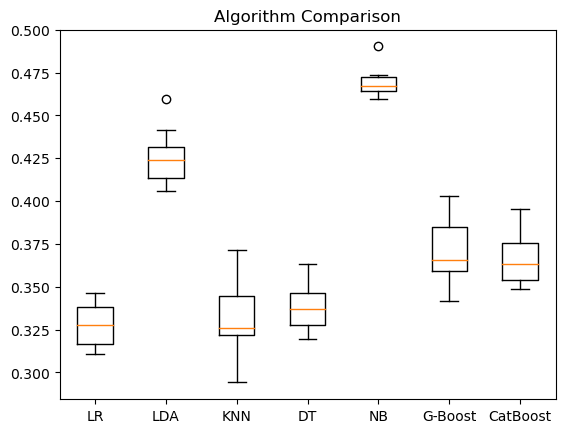

In [25]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

### 2.5) Best model and its evaluation
Finally we will proceed with the algorithm wihci performed better with our dataset.
Here, Naive Bayes is selected. We also chose one of the boosing algorithm (GradientBoostingClassifier) and try to tune its parameters.

#### 2.5.1) Naive Bayes

In [26]:
model_NB = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=model_NB, 
                 param_grid=params_NB, 
                 cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                 verbose=False,
                 scoring='f1')

gs_NB.fit(X_train, y_train)
y_prod_NB = gs_NB.predict(X_test)

# because it is imbalanced, we use precision, recall and f1-score
print("metrics (precision, recall, f1-score):", precision_recall_fscore_support(y_test, y_prod_NB, average='binary'))

# accuracy
print("Accuracy:", accuracy_score(y_test, y_prod_NB))

# confusion matrix
print("Confusion matrix:\n", confusion_matrix(y_test, y_prod_NB))

metrics (precision, recall, f1-score): (0.41153546375681993, 0.5480968858131487, 0.4700994212791215, None)
Accuracy: 0.8770147403223585
Confusion matrix:
 [[23881  2265]
 [ 1306  1584]]


#### 2.5.2) Gradient Boosting

In [27]:
# optimizing learning rate in Gradient boosting
learning_rates = [1, 0.5, 0.25, 0.1, 0.05]

for learning_rate in learning_rates:
    y_prod_gboost = gb(X_train, y_train, X_test, 20, learning_rate, 6, 5, 5)
    print("Learning rate: ", learning_rate)
    print("metrics (precision, recall, f1-score):", precision_recall_fscore_support(y_test, y_prod_gboost, average='binary'))

Learning rate:  1
metrics (precision, recall, f1-score): (0.4917541229385307, 0.22698961937716264, 0.3106060606060606, None)
Learning rate:  0.5
metrics (precision, recall, f1-score): (0.5625451916124368, 0.26920415224913496, 0.36414696934238244, None)
Learning rate:  0.25
metrics (precision, recall, f1-score): (0.5963718820861678, 0.2730103806228374, 0.3745549489674816, None)
Learning rate:  0.1
metrics (precision, recall, f1-score): (0.6458557588805167, 0.20761245674740483, 0.3142183817753339, None)
Learning rate:  0.05
metrics (precision, recall, f1-score): (0.7910447761194029, 0.01833910034602076, 0.03584714237402773, None)


In [28]:
# optimizing n_estimator in Gradient boosting
n_estimators = [10, 20, 30, 50, 70, 100]

for n in n_estimators:
    y_prod_gboost = gb(X_train, y_train, X_test, n, 0.25, 5, 5, 5)
    print("n_estimator: ", n)
    print("metrics (precision, recall, f1-score):", precision_recall_fscore_support(y_test, y_prod_gboost, average='binary'))

n_estimator:  10
metrics (precision, recall, f1-score): (0.6157283288650581, 0.23840830449826989, 0.34372661511598906, None)
n_estimator:  20
metrics (precision, recall, f1-score): (0.5973207249802994, 0.2622837370242215, 0.3645106996874249, None)
n_estimator:  30
metrics (precision, recall, f1-score): (0.5932463545663853, 0.26747404844290656, 0.36870975435249226, None)
n_estimator:  50
metrics (precision, recall, f1-score): (0.5863636363636363, 0.26782006920415224, 0.3676959619952494, None)
n_estimator:  70
metrics (precision, recall, f1-score): (0.5731254639940608, 0.2671280276816609, 0.3644087797970262, None)
n_estimator:  100
metrics (precision, recall, f1-score): (0.5680173661360347, 0.27162629757785467, 0.3675093632958802, None)


In [29]:
# select the best learning rate and n_estimator
y_prod_gboost = gb(X_train, y_train, X_test, 20, 0.25, 6, 5, 5)

# because it is imbalanced, we use precision, recall and f1-score
print("Metrics (precision, recall, f1-score):", precision_recall_fscore_support(y_test, y_prod_gboost, average='binary'))

# accuracy
print("Accuracy:", accuracy_score(y_test, y_prod_gboost))

# confusion matrix
print("Confusion matrix:\n", confusion_matrix(y_test, y_prod_gboost))

Metrics (precision, recall, f1-score): (0.5963718820861678, 0.2730103806228374, 0.3745549489674816, None)
Accuracy: 0.9092505854800936
Confusion matrix:
 [[25612   534]
 [ 2101   789]]


# 3) Conclusion
- One of the foundings was that department 7 and 6(slightly) have positive correlation with churn and we need to improve the quality of their services/products.
- In our case, NaiveBayes was the best algorithm. We tried to tune some of its parameters. We also tried one of the boosing algorithms (Gradient Boosting) and then we tried to tune its parameters.
- Each of the parameters can be optimized using a loop. For instance, here for the Gradient Boosting algorithm, we tried several values for learning rate and n_estimator and finally we chose the best ones. The other parameters (such as max_depth, min_samples_split, min_samples_leaf, max_features and etc.) can be tune in the same way.
- The confusion matrix is one of the best metrics to verify the imbalanced data and we also used it here. In addition, based on the importance of False Negative or False Positive we can use Recall and Precision respectively. The accuracy is also computed (just to see its results).
- Gradient boosting performed better in identifying the true negative and false negative while Naive Bayse outperformed Gradient boosting in finding the true positive and false positive.
- **Some recommendations or next steps**:
    - The outliers section can be improved. For the simplicity We dropped the %0.05 of the percentile, however each of the features could be analized one by one and individually to find the outliers. Considering a feature, we can delete the data samples which are very far from the mode or mean of the current feature. However, sometimes far values are still meaningful and we need to understand the feature and check it with business.
    - To select the best features in the feature selection part, although RFECV is one of the effective methods but also trying and comparing other methods might lead us to better features/performance.
    - We observed that the data is inbalanced, and it is advised to gather more data if possible (otherwise sampling method can be used).
    - Parameter tuning takes time but makes the algorithm perform better.
    - We used SMOTE to overcome the imbalanced data, however other methods such as **Borderline-SMOTE**, **ADASYN** and etc. could be employed. Moreover, for the resampling we used ROC AUC and other metrics could be used based our needs (ROC AUC is still a good metric here).
    - Discussing with the business is always effective to understand the data better. For example to understand the outliers, best metric (e.g. importance of false positive or false negative), etc.
    - In order to deploy the model we need to know if our approach is correct. 
        - With our models, the business can make knowledgeable decisions that can secure the company’s future. (ex, improving quality in department 7).
        - Thew important features which have domionance impact on churn (in our experiment: **\_3_pcts_gross_turnover_3**, **\_3_pcts_gross_turnover_4**,        **\_3_turnover_24months**, **\_2_std_days_between_orders**, **\_2_frequency_24months**, **\_2_transactional_recency**,        **\_1_customer_tenure_months**) are identified which can help the business to improve and enhance them.
        - Several elements of a data science model need cohesive collaboration to ensure a successful deployment:
            - Create a benchmark model to produce the same outcome as the completed project.
            - Creating some prototype to meet the objectives.
            - Access to the right data
            - Implement Data Modeling
            - Evaluate the models
            - Deploy the model if its evaluations fulfilled the objectives.
            - Knowing a platform to automate the model (docker, aws, gcp, azure, etc.).
            - Check the performance of the model periodically and update it if the performance dropped from a certain threshold.